# 201600779 김영민

In [1]:
import torch
import torchvision
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/dㅠrive')

Mounted at /content/drive


In [6]:
import torch.nn as nn

In [2]:
import os
os.chdir('/content/drive/MyDrive/GAN_basic')

In [3]:
## 1번

In [4]:
def generate_real():
    real_data = torch.FloatTensor(
        [random.uniform(0.8,1.0),
         random.uniform(0.0,0.2),
         random.uniform(0.0,0.2)]
    )
    return real_data

In [14]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(3,3),
            nn.Sigmoid(),
            nn.Linear(3,1),
            nn.Sigmoid()
        )    
        self.loss = nn.MSELoss()

        self.optimizer = torch.optim.SGD(self.parameters(),lr= 1e-3)

        self.counter = 0
        self.progress = []
    def forward(self,x):
        return self.model(x)

    def train(self,inputs,targets):
        outputs = self.forward(inputs)
        loss = self.loss(outputs,targets)
        self.counter += 1
        if self.counter % 10 == 0:
            self.progress.append(loss.item())
        if self.counter % 10000 == 0:
            print('counter = ',self.counter)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
    def plot_progress(self):
        # print(self.progress)
        df = pd.DataFrame(self.progress,columns = ['loss'])
        df.plot(ylim = (0,1.0), figsize = (16,8),alpha = 0.1,marker = '.',grid = True,yticks = (0,0.25,0.5))

In [15]:
def generate_random(size):
    random_data = torch.rand(size)
    return random_data

In [16]:
D = Discriminator()

In [17]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(1,3),
            nn.Sigmoid(),
            nn.Linear(3,3),
            nn.Sigmoid()
        )
        self.optimizer = torch.optim.SGD(self.parameters(),lr = 1e-3)

        self.counter = 0
        self.progress = []
    def forward(self,x):
        return self.model(x)
    
    def train(self,D,inputs,targets):
        g_output = self.forward(inputs) # generator 훈련
        d_output = D.forward(g_output) # 판별기에 전달
        loss = D.loss(d_output,targets) # 실제값과 판별기에서 나온 값 비교 loss
        self.counter += 1
        if self.counter % 10 == 0:
            self.progress.append(loss.item())
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
    def plot_progress(self):
        # print(self.progress)
        df = pd.DataFrame(self.progress,columns = ['loss'])
        df.plot(ylim = (0,1.0), figsize = (16,8),alpha = 0.1,marker = '.',grid = True,yticks = (0,0.25,0.5))

In [18]:
G = Generator()
G.forward(torch.FloatTensor([0.5]))

tensor([0.4401, 0.5931, 0.4732], grad_fn=<SigmoidBackward0>)

In [20]:
D = Discriminator()
G = Generator()
import random

for i in range(10000):
    D.train(generate_real(),torch.FloatTensor([1.0])) # 판별기 훈련
    D.train(G.forward(torch.FloatTensor([0.5]).detach()),torch.FloatTensor([0,0]))
    G.train(D,torch.FloatTensor([0.5]),torch.FloatTensor([1.0]))

counter =  10000
counter =  20000


In [21]:
G.forward(torch.FloatTensor([0.5]))

tensor([0.6165, 0.2370, 0.5994], grad_fn=<SigmoidBackward0>)

In [22]:
## 2번

In [23]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
import torchvision
import torchvision.transforms as T
import torch.nn as nn
from torchsummary import summary

In [53]:
BATCH_SIZE = 64

In [54]:
# Fashion MNIST 데이터셋
trainset = datasets.MNIST(
    root      = './.data/', 
    train     = True,
    download  = True,
    transform = T.ToTensor()
)
train_loader = torch.utils.data.DataLoader(
    dataset     = trainset,
    batch_size  = BATCH_SIZE,
    shuffle     = True,
    num_workers = 2
)

In [25]:
train_img,train_label = trainset[0]
print(train_img.shape)
test_img,test_label = testset[0]
print(test_img.shape)

torch.Size([1, 28, 28])
torch.Size([1, 28, 28])


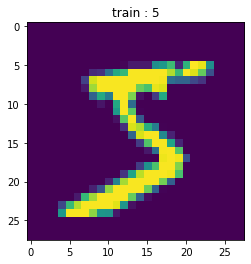

In [26]:
plt.title(f'train : {train_label}')
plt.imshow(train_img.reshape(28,28))

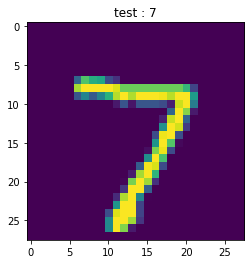

In [27]:
plt.title(f'test : {test_label}')
plt.imshow(test_img.reshape(28,28))

In [33]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Linear(256, 2),

        )
        self.decoder = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Linear(256, 28*28),
            nn.Sigmoid(),       # 픽셀당 0과 1 사이로 값을 출력합니다
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

In [34]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [35]:
model = Autoencoder()

In [40]:
model.to(device)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=784, bias=True)
    (3): Sigmoid()
  )
)

In [36]:
print(model)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=784, bias=True)
    (3): Sigmoid()
  )
)


In [75]:
for i in model.named_children():
    print(i)

('encoder', Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=2, bias=True)
))
('decoder', Sequential(
  (0): Linear(in_features=2, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=784, bias=True)
  (3): Sigmoid()
))


In [47]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
criterion = nn.MSELoss()

In [62]:
def train(autoencoder, train_loader):
    autoencoder.train()
    for step, (x, label) in enumerate(train_loader):
        x = x.view(-1, 28*28).to(device)
        y = x.view(-1, 28*28).to(device)
        label = label.to(device)

        encoded, decoded = autoencoder(x)

        loss = criterion(decoded, y)
        loss_arr.append(loss)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


In [58]:
EPOCH = 10

In [64]:
view_data = trainset.data[:5].view(-1, 28*28)
view_data = view_data.type(torch.FloatTensor)/255.

[Epoch 1]


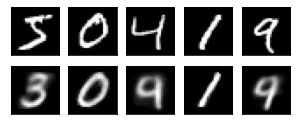

[Epoch 2]


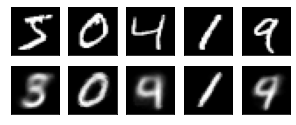

[Epoch 3]


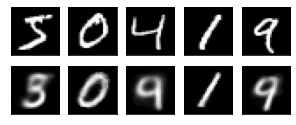

[Epoch 4]


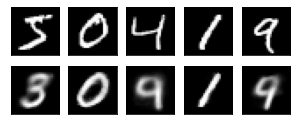

[Epoch 5]


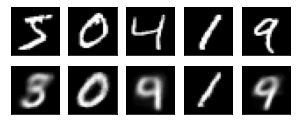

[Epoch 6]


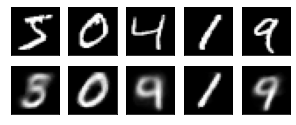

[Epoch 7]


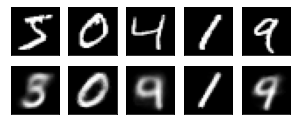

[Epoch 8]


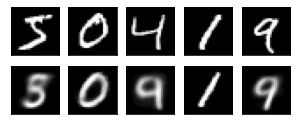

[Epoch 9]


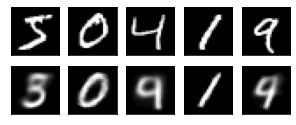

[Epoch 10]


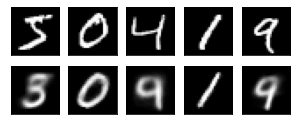

In [68]:
loss_arr = []
for epoch in range(1, EPOCH+1):
    model.train()
    for step, (x, label) in enumerate(train_loader):
        x = x.view(-1, 28*28).to(device)
        y = x.view(-1, 28*28).to(device)
        label = label.to(device)

        encoded, decoded = model(x)

        loss = criterion(decoded, y)
        loss_arr.append(loss)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # 디코더에서 나온 이미지를 시각화 하기 (두번째 열)
    test_x = view_data.to(device)
    _, decoded_data = model(test_x)

    # 원본과 디코딩 결과 비교해보기
    f, a = plt.subplots(2, 5, figsize=(5, 2))
    print("[Epoch {}]".format(epoch))
    for i in range(5):
        img = np.reshape(view_data.data.numpy()[i],(28, 28))
        a[0][i].imshow(img, cmap='gray')
        a[0][i].set_xticks(()); a[0][i].set_yticks(())

    for i in range(5):
        img = np.reshape(decoded_data.to("cpu").data.numpy()[i], (28, 28))
        a[1][i].imshow(img, cmap='gray')
        a[1][i].set_xticks(()); a[1][i].set_yticks(())
    plt.show()

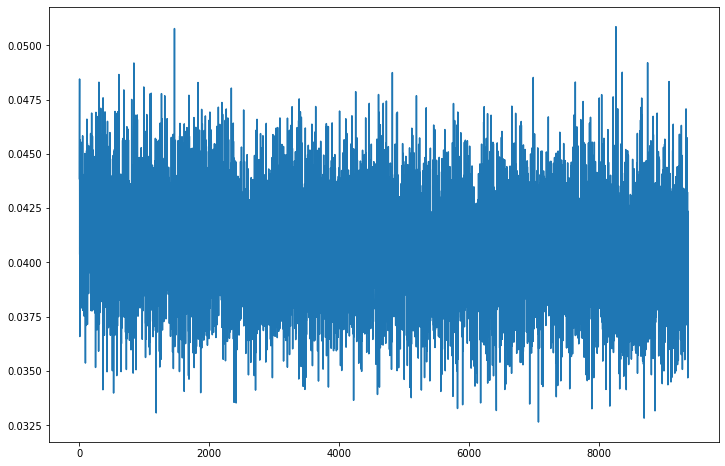

In [73]:
plt.figure(figsize=(12,8))
plt.plot(loss_arr)

In [ ]:
## 3번

In [69]:
data = pd.read_csv('weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [81]:
print(data.shape)

(10000, 3)


In [80]:
data.iloc[0]

Gender       Male
Height     73.847
Weight    241.894
Name: 0, dtype: object

In [85]:
man = data[data['Gender']=='Male'].reset_index(drop=True)
woman = data[data['Gender'] == 'Female'].reset_index(drop=True)

In [86]:
print(man.shape)
print(woman.shape)

(5000, 3)
(5000, 3)


In [87]:
from sklearn.model_selection import train_test_split
# train_man,test_man = train_test_split(man,test_size = .5,random_state = 42)
train_man = man.iloc[:2500]
test_man = man.iloc[2500:]
train_woman = woman.iloc[:2500]
test_woman = woman.iloc[2500:]

In [88]:
# train man
print(train_man.iloc[0])
print('--------')
print(train_man.iloc[-1])

Gender       Male
Height     73.847
Weight    241.894
Name: 0, dtype: object
Gender       Male
Height    68.3123
Weight    169.781
Name: 2499, dtype: object


In [89]:
# test man
print(test_man.iloc[0])
print('--------')
print(test_man.iloc[-1])

Gender       Male
Height    61.0745
Weight     122.68
Name: 2500, dtype: object
--------
Gender       Male
Height    70.3519
Weight    198.903
Name: 4999, dtype: object


In [90]:
# train woman
print(train_woman.iloc[0])
print('--------')
print(train_woman.iloc[-1])

Gender     Female
Height    58.9107
Weight    102.088
Name: 0, dtype: object
--------
Gender     Female
Height    57.1482
Weight    91.6455
Name: 2499, dtype: object


In [91]:
# test woman
print(test_woman.iloc[0])
print('--------')
print(test_woman.iloc[-1])

Gender     Female
Height    64.5241
Weight    129.202
Name: 2500, dtype: object
--------
Gender     Female
Height    61.9442
Weight    113.649
Name: 4999, dtype: object


In [93]:
import seaborn as sns

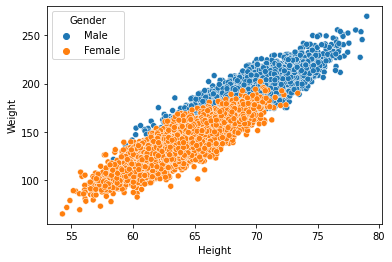

In [95]:
sns.scatterplot(data['Height'],data['Weight'],hue=data['Gender'])

In [99]:
x= torch.tensor(train_man['Weight'].values,dtype=torch.float).reshape(-1,1)
y= torch.tensor(train_man['Height'].values,dtype=torch.float).reshape(-1,1)

In [111]:
model_nn = nn.Sequential(
          nn.Linear(1,50),
          nn.ReLU(),
          nn.Linear(50,100),
          nn.ReLU(),
          nn.Linear(100,1)
      )
# model_nn = fc_model().to(device)
loss_func = nn.L1Loss()
optimizer = torch.optim.Adam(model_nn.parameters(),lr=0.0002)
print(model_nn)

Sequential(
  (0): Linear(in_features=1, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=1, bias=True)
)


In [112]:
loss_array = []
num_epoch = 1000
model_nn.train()
for i in range(num_epoch):
    optimizer.zero_grad()
    output = model_nn(x)
    
    loss = loss_func(output,y)
    loss.backward()
    optimizer.step()
    
    loss_array.append(loss)


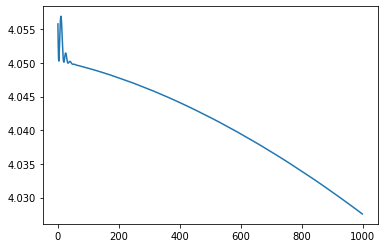

In [104]:
plt.plot(loss_array)

In [105]:
test_x= torch.tensor(test_man['Weight'].values,dtype=torch.float).reshape(-1,1)
test_y= torch.tensor(test_man['Height'].values,dtype=torch.float).reshape(-1,1)

In [117]:
from sklearn.metrics import mean_absolute_error

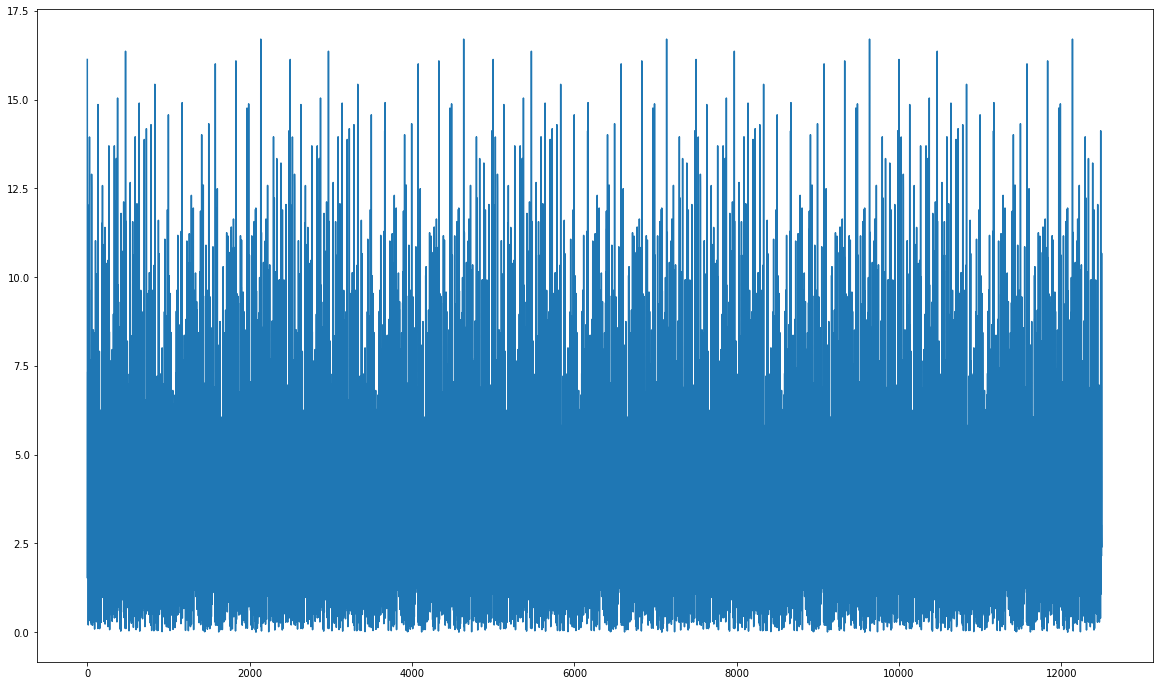

In [132]:

acc_list = []
with torch.no_grad():
    model_nn.eval()
    for i in range(5):
        # acc = 0
        for x,y in zip(test_x,test_y):
            optimizer.zero_grad()
            output = model_nn(x)
            output = output.cpu().detach().numpy()
            label = y.cpu().detach().numpy()
            acc_list.append(mean_absolute_error(output,label))
        # acc_list.append(np.mean(acc))
plt.figure(figsize = (20,12))
plt.plot(acc_list)

# 201600779 김영민